# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
- Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
#Your code here
import pandas as pd
groups = pd.read_csv('nashville-meetup/group-edges.csv')
groups.head()

Unnamed: 0    group1    group2  weight
0           0  19292162    535553       2
1           1  19292162  19194894       1
2           2  19292162  19728145       1
3           3  19292162  18850080       2
4           4  19292162   1728035       1

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [2]:
#Your code here
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

group_id                                 group_name  num_members  \
0    339011                    Nashville Hiking Meetup        15838   
1  19728145           Stepping Out Social Dance Meetup         1778   
2   6335372                           Nashville soccer         2869   
3  10016242                                     NashJS         1975   
4  21174496  20's & 30's Women looking for girlfriends         2782   

   category_id         category_name  organizer_id             group_urlname  
0           23  Outdoors & Adventure       4353803          nashville-hiking  
1            5               Dancing     118484462    steppingoutsocialdance  
2           32   Sports & Recreation     108448302          Nashville-soccer  
3           34                  Tech       8111102                    nashjs  
4           31           Socializing     184580248  new-friends-in-Nashville

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [3]:
#Your code here
import networkx as nx

group_dict = dict(zip(groups_meta.group_id, groups_meta.group_name))
G = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    G.add_edge(g1, g2, weight=weight)

## Visualize the Network

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


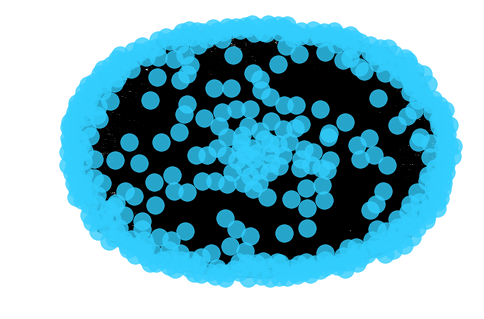

In [4]:
#Your code here
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G, pos=nx.spring_layout(G, k=2, seed=5), alpha=.8, node_color="#32cefe")

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

In [5]:
#Your code here
for i in range(0,100,5):
    print("{}th percentile: {}".format(i,groups.weight.quantile(q=i/100)))

0th percentile: 1.0
5th percentile: 1.0
10th percentile: 1.0
15th percentile: 1.0
20th percentile: 1.0
25th percentile: 1.0
30th percentile: 1.0
35th percentile: 1.0
40th percentile: 1.0
45th percentile: 1.0
50th percentile: 1.0
55th percentile: 1.0
60th percentile: 1.0
65th percentile: 1.0
70th percentile: 2.0
75th percentile: 2.0
80th percentile: 2.0
85th percentile: 3.0
90th percentile: 4.0
95th percentile: 7.0


C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


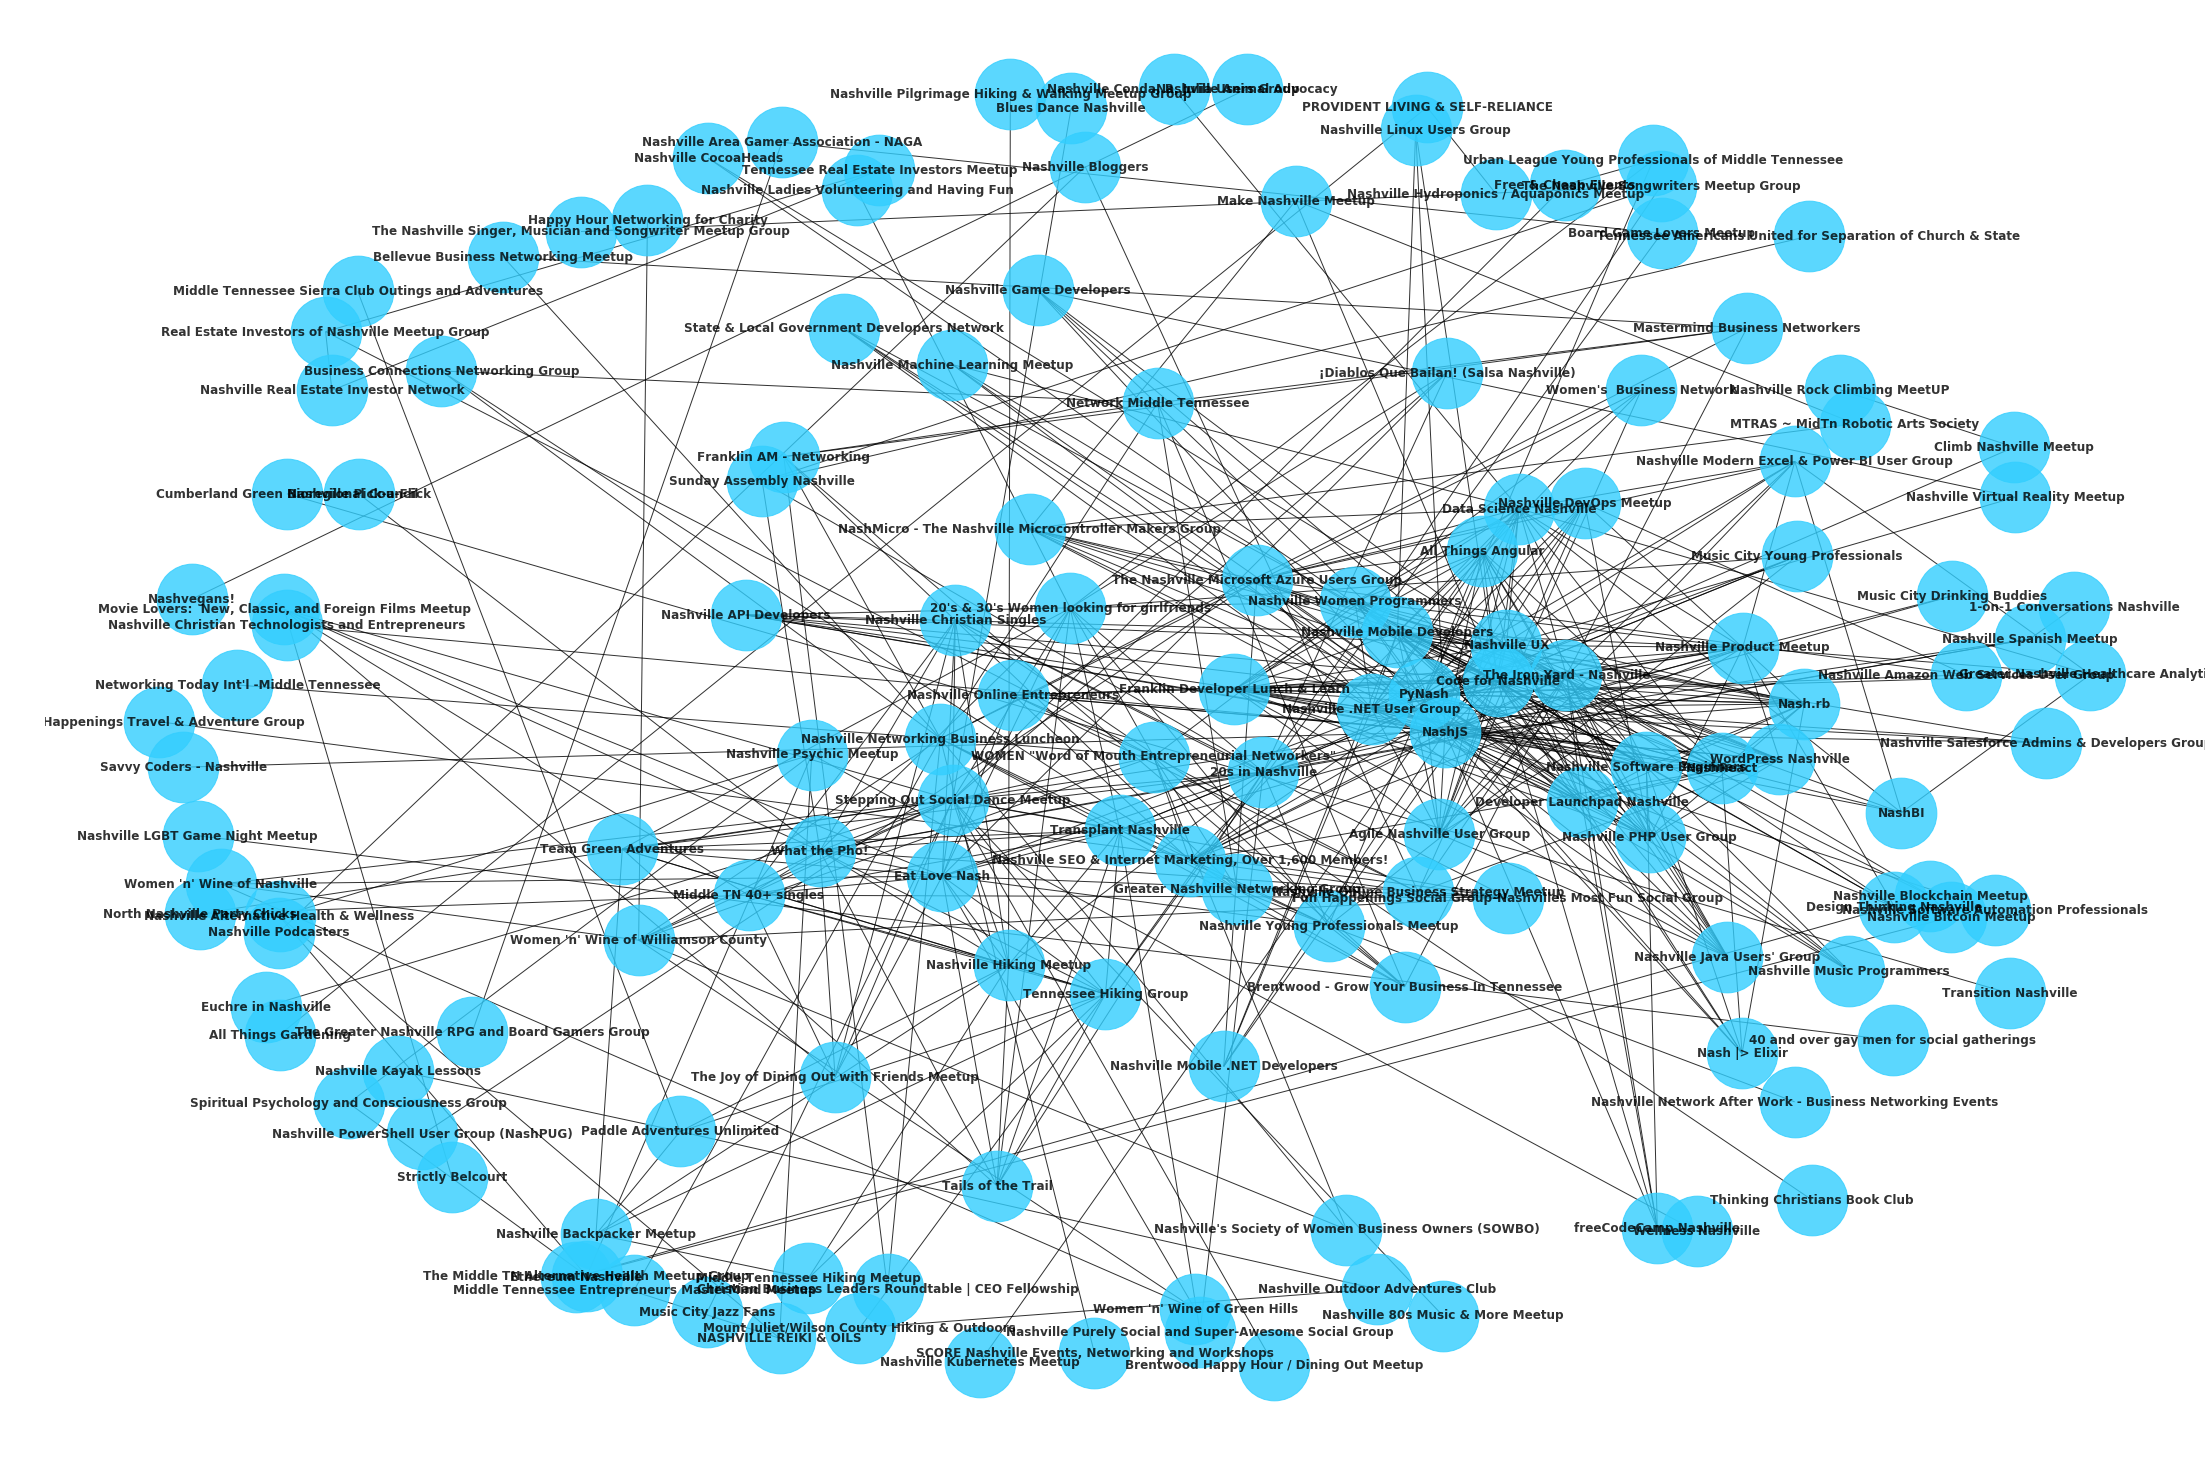

In [6]:
threshold = 5
G_subset = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    if weight > threshold:
        G_subset.add_edge(g1, g2, weight=weight)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
        alpha=.8, node_color="#32cefe", node_size=5000,
        with_labels=True, font_size=12, font_weight="bold")

## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [7]:
#Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
for n, clusters in enumerate(gn_clusters):
    print("After removing {} edges, there are {} clusters.".format(n, len(clusters)))

After removing 0 edges, there are 7 clusters.
After removing 1 edges, there are 8 clusters.
After removing 2 edges, there are 9 clusters.
After removing 3 edges, there are 10 clusters.
After removing 4 edges, there are 11 clusters.
After removing 5 edges, there are 12 clusters.
After removing 6 edges, there are 13 clusters.
After removing 7 edges, there are 14 clusters.
After removing 8 edges, there are 15 clusters.
After removing 9 edges, there are 16 clusters.
After removing 10 edges, there are 17 clusters.
After removing 11 edges, there are 18 clusters.
After removing 12 edges, there are 19 clusters.
After removing 13 edges, there are 20 clusters.
After removing 14 edges, there are 21 clusters.
After removing 15 edges, there are 22 clusters.
After removing 16 edges, there are 23 clusters.
After removing 17 edges, there are 24 clusters.
After removing 18 edges, there are 25 clusters.
After removing 19 edges, there are 26 clusters.
After removing 20 edges, there are 27 clusters.
After

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

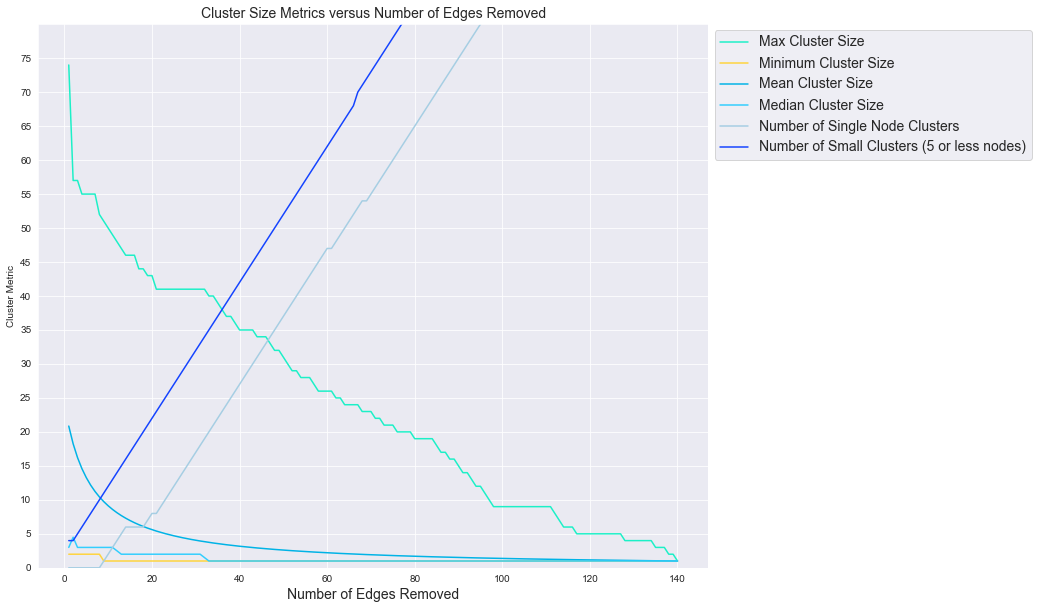

In [8]:
#Your code here
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

C:\Users\Drew\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


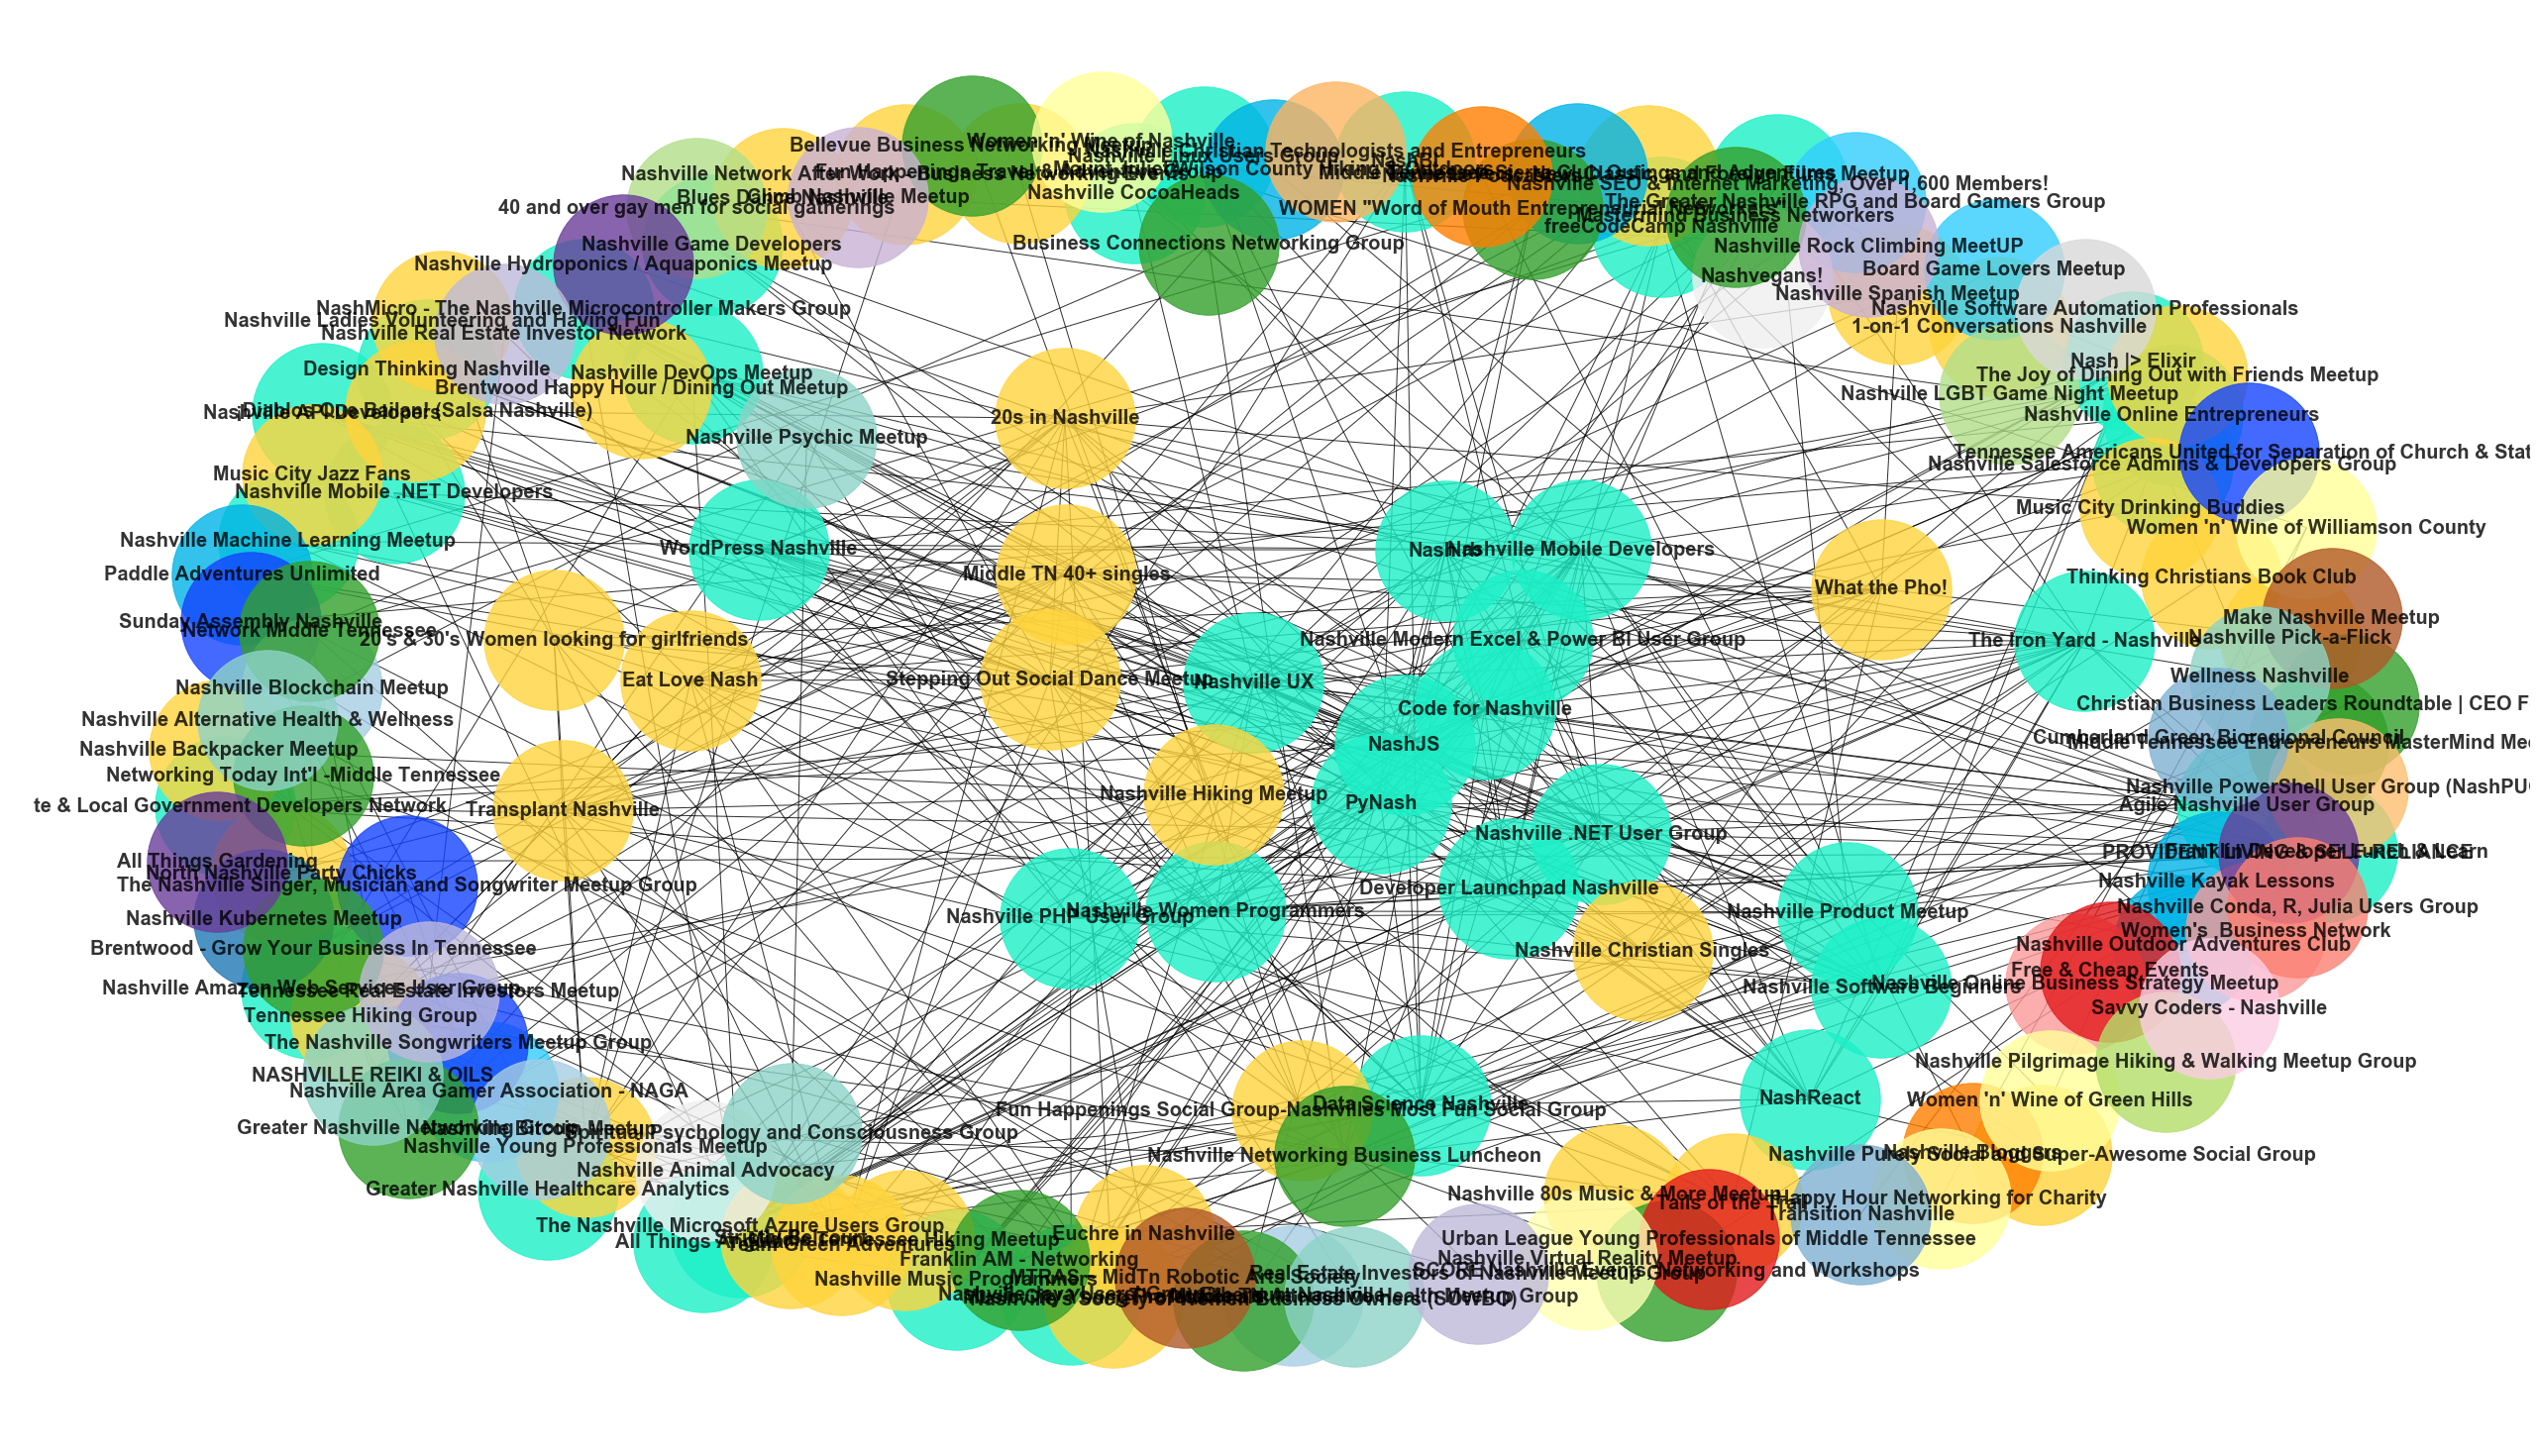

In [9]:
#Your code here
def plot_girvan_newman(G, clusters):
    #Your code here
    fig = plt.figure(figsize=(35,20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"]
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G_subset, k=3.6, seed=3), with_labels=True, node_color=colors[n],
                alpha=.8, node_size=20000, font_weight="bold", font_size=20)
    plt.show()
sns.set_style('white')
plot_girvan_newman(G_subset, gn_clusters[20])

In [10]:
#Because the Network is still dense and names are long, organizing the clusters as a Pandas dataframe is appropriate
clusters = pd.DataFrame(gn_clusters[20]).transpose()
clusters.columns = ["Cluster{}".format(i) for i in range(1,len(clusters.columns)+1)]
clusters

#Many of the clusters are easily identifiable;
#You can see that cluster 1 is a technology group,
#cluster 2 is a social hodgepodge,
#cluster3 is outdoor enthusiasts,
#cluster4 is gamers, and so forth

Cluster1  \
0                                  All Things Angular   
1                           Nashville Game Developers   
2              Greater Nashville Healthcare Analytics   
3                              freeCodeCamp Nashville   
4                         Nashville Mobile Developers   
5                         Nashville Linux Users Group   
6                                 WordPress Nashville   
7                                           NashReact   
8                           Nashville .NET User Group   
9                         Nashville Music Programmers   
10                           Nashville PHP User Group   
11                          Design Thinking Nashville   
12                             Data Science Nashville   
13                   Nashville Mobile .NET Developers   
14                   Franklin Developer Lunch & Learn   
15                                       Nashville UX   
16          The Nashville Microsoft Azure Users Group   
17                        Nashville Java Users' Group   
18                                 Code for Nashville   
19       Nashville Modern Excel & Power BI User Group   
20                         Agile Nashville User Group   
21                  Nashville Machine Learning Meetup   
22                               Nashville CocoaHeads   
23                           Nashville API Developers   
24                       Nashville Software Beginners   
25                                     Nash |> Elixir   
26  Nashville SEO & Internet Marketing, Over 1,600...   
27     Nashville Salesforce Admins & Developers Group   
28  NashMicro - The Nashville Microcontroller Make...   
29                      Developer Launchpad Nashville   
30                     Nashville Online Entrepreneurs   
31                                             PyNash   
32                                             NashBI   
33                                             NashJS   
34        State & Local Government Developers Network   
35                          The Iron Yard - Nashville   
36                        Nashville Women Programmers   
37                            Nashville DevOps Meetup   
38           Nashville Amazon Web Services User Group   
39                                            Nash.rb   
40                           Nashville Product Meetup   

                                             Cluster2  \
0                             Nashville Hiking Meetup   
1                         Nashville Christian Singles   
2   Fun Happenings Social Group-Nashvilles Most Fu...   
3   Movie Lovers:  New, Classic, and Foreign Films...   
4             Fun Happenings Travel & Adventure Group   
5                         Nashville Backpacker Meetup   
6                                   Strictly Belcourt   
7           20's & 30's Women looking for girlfriends   
8                      1-on-1 Conversations Nashville   
9                                       What the Pho!   
10                             Tennessee Hiking Group   
11                     Middle Tennessee Hiking Meetup   
12                              Middle TN 40+ singles   
13                        Music City Drinking Buddies   
14             ¡Diablos Que Bailan! (Salsa Nashville)   
15                               Transplant Nashville   
16               Nashville Young Professionals Meetup   
17  Nashville Purely Social and Super-Awesome Soci...   
18                       North Nashville Party Chicks   
19                              Blues Dance Nashville   
20                               Music City Jazz Fans   
21       Nashville Ladies Volunteering and Having Fun   
22                     Music City Young Professionals   
23                                Euchre in Nashville   
24                                      Eat Love Nash   
25                           Nashville Spanish Meetup   
26           Brentwood Happy Hour / Dining Out Meetup   
27  Nashville Network After Work - Business Networ... 

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               